In [1]:
import tensorflow as tf

/home/skipper/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/skipper/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/skipper/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/skipper/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

In [2]:
from tensorflow import keras

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

tensorflow.python.util.deprecation_wrapper.DeprecationWrapper

In [6]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [7]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [8]:
np.max(X_train)

255

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ['top','trowser','pullover','dress','coat','sandle','shirt','sneaker','bag','boot']

In [11]:
X_test.shape

(10000, 28, 28)

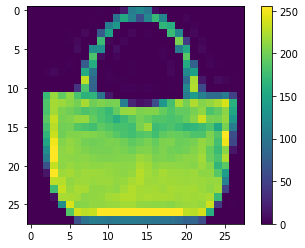

In [12]:
plt.figure()
plt.imshow(X_train[100])
plt.colorbar()

In [13]:
X_train = X_train/255
X_test = X_test/255

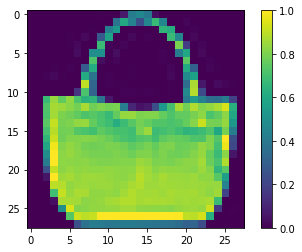

In [14]:
plt.figure()
plt.imshow(X_train[100])
plt.colorbar()

In [15]:
#build model

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [17]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(X_train,y_train,epochs = 10,batch_size=10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 24s 499us/sample - loss: 0.5030 - acc: 0.8169 - val_loss: 0.4157 - val_acc: 0.8538
Epoch 2/10
48000/48000 [==============================] - 23s 484us/sample - loss: 0.3836 - acc: 0.8583 - val_loss: 0.3968 - val_acc: 0.8587
Epoch 3/10
48000/48000 [==============================] - 23s 485us/sample - loss: 0.3475 - acc: 0.8714 - val_loss: 0.3450 - val_acc: 0.8748
Epoch 4/10
48000/48000 [==============================] - 23s 483us/sample - loss: 0.3197 - acc: 0.8825 - val_loss: 0.4314 - val_acc: 0.8450
Epoch 5/10
48000/48000 [==============================] - 24s 493us/sample - loss: 0.3039 - acc: 0.8862 - val_loss: 0.3788 - val_acc: 0.8688
Epoch 6/10
48000/48000 [==============================] - 25s 525us/sample - loss: 0.2927 - acc: 0.8908 - val_loss: 0.3431 - val_acc: 0.8807
Epoch 7/10
48000/48000 [==============================] - 25s 530us/sample - loss: 0.2752 - acc: 0.8967 

In [21]:
test_loss,test_acc = model.evaluate(X_test,y_test)
print(test_loss,test_acc)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.3659 - acc: 0.8825
0.3658549719810486 0.8825


In [22]:
pred = model.predict_classes(X_test)

In [23]:
pred

array([9, 2, 1, ..., 8, 1, 5])

<h1>Plotting Learning Curve And Confusion Matrix</h1>

In [24]:
history

In [25]:
history.history

{'loss': [0.502977862728585,
  0.3835869234076866,
  0.3474915304296155,
  0.31965677854069025,
  0.30386228596584564,
  0.2926948999373902,
  0.2752258916305569,
  0.26880703106564396,
  0.26134122104853,
  0.2512026362150539],
 'acc': [0.81689584,
  0.8582708,
  0.8714167,
  0.88252085,
  0.8861875,
  0.8908333,
  0.89675,
  0.90022916,
  0.90227085,
  0.90664583],
 'val_loss': [0.4156943409183684,
  0.39683240992211116,
  0.3449880039874309,
  0.43141129371128045,
  0.3787644394513821,
  0.3430879963080709,
  0.342939945027659,
  0.37342344680209255,
  0.3443917498933539,
  0.32307720569040005],
 'val_acc': [0.8538333,
  0.85866666,
  0.87483335,
  0.845,
  0.86883336,
  0.8806667,
  0.87675,
  0.87416667,
  0.882,
  0.89091665]}

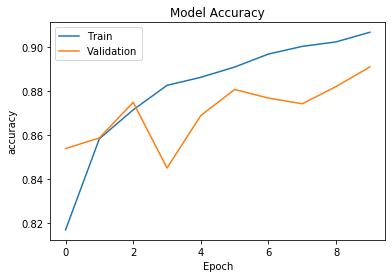

In [28]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()

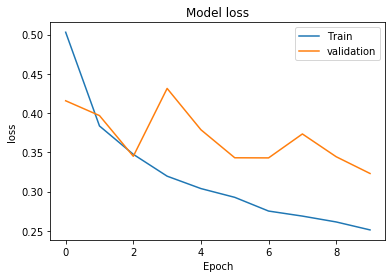

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','validation'],loc = 'upper right')
plt.show()

In [30]:
from mlxtend.plotting import plot_confusion_matrix

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
mat = confusion_matrix(y_test,pred)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4d79df2be0>)

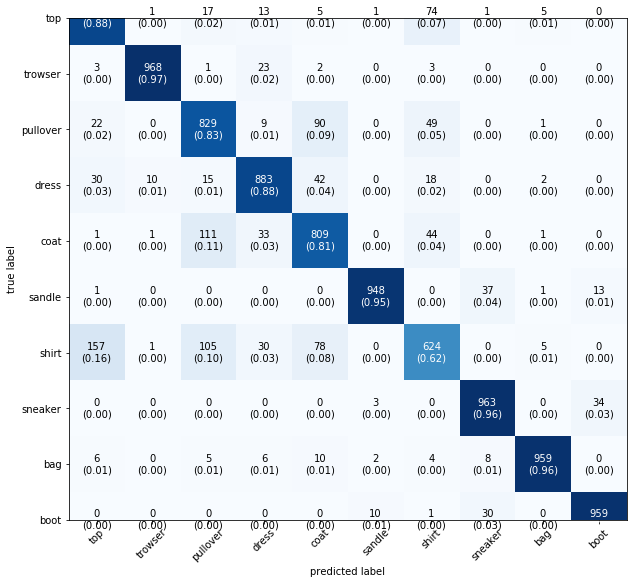

In [41]:
plot_confusion_matrix(conf_mat = mat,figsize = (10,10),class_names=class_names,show_normed=True)